## Import Library

In [1]:
import pandas as pd
import numpy as np
import sklearn as skl
import seaborn as sns

KeyboardInterrupt: 

## Import Data

In [3]:
MLdata = pd.read_excel('/Users/chriz_yu/Downloads/data_set/MLdataFull_2.xlsx')

In [4]:
MLdata.head()

,IID,MID,count_item,Male_PERC,Female_PERC,UnkownAge,Age_18_less,Age_18_24,Age_25_29,Age_30_34,Age_35_40,Age_41_49,Age_50_more,VIP,NON_VIP,IID.1,MID.1,count_item.1
0,98,4044,4,0.0,1.0,0.00,0,0.0,1.00,0.00,0.0,0.0,0.0,0.0,1.0,98,4044,1
1,124,3729,4,0.0,1.0,0.25,0,0.0,0.75,0.00,0.0,0.0,0.0,0.0,1.0,124,3729,1
2,424,3432,1,1.0,0.0,0.00,0,0.0,0.00,1.00,0.0,0.0,0.0,0.0,1.0,424,3432,2
3,467,1056,1,0.0,1.0,0.00,0,0.0,0.00,1.00,0.0,0.0,0.0,0.0,1.0,467,1056,1
4,568,270,4,0.0,1.0,0.00,0,0.0,0.25,0.75,0.0,0.0,0.0,0.0,1.0,568,270,2


In [65]:
# MLdata2 = pd.get_dummies(data=MLdata,drop_first=True)
len(MLdata)

7943

In [6]:
MLdata.sort_values(by=['count_item'], ascending= False)

,IID,MID,count_item,Male_PERC,Female_PERC,UnkownAge,Age_18_less,Age_18_24,Age_25_29,Age_30_34,Age_35_40,Age_41_49,Age_50_more,VIP,NON_VIP,IID.1,MID.1,count_item.1
486,67897,184,262,0.442748,0.557252,0.057252,0,0.068702,0.320611,0.362595,0.103053,0.076336,0.011450,0.000000,1.000000,67897,184,18
5550,783997,184,208,0.528846,0.471154,0.038462,0,0.081731,0.389423,0.307692,0.091346,0.076923,0.014423,0.000000,1.000000,783997,184,22
4524,636863,3678,81,0.493827,0.506173,0.024691,0,0.086420,0.358025,0.296296,0.111111,0.086420,0.037037,0.000000,1.000000,636863,3678,6
438,61518,2371,68,0.426471,0.573529,0.088235,0,0.073529,0.441176,0.220588,0.102941,0.029412,0.044118,0.000000,1.000000,61518,2371,3
5453,770668,4173,65,0.184615,0.815385,0.123077,0,0.000000,0.323077,0.369231,0.138462,0.015385,0.030769,0.318182,0.681818,770668,4173,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4979,703204,4178,1,0.000000,1.000000,0.000000,0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,703204,4178,1
1805,258295,3663,1,0.000000,1.000000,1.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,258295,3663,1
4981,703408,1679,1,0.000000,1.000000,0.000000,0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,703408,1679,1
1804,258183,4504,1,1.000000,0.000000,0.000000,0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,258183,4504,1


In [68]:
x = MLdata.drop(['count_item','IID','MID','Male_PERC', 'NON_VIP', 'IID.1','MID.1','count_item.1'],axis=1).values
y = MLdata['count_item.1'].values


(array([7.629e+03, 2.120e+02, 6.800e+01, 1.800e+01, 6.000e+00, 3.000e+00,
        3.000e+00, 0.000e+00, 3.000e+00, 1.000e+00]),
 array([ 1. ,  5.5, 10. , 14.5, 19. , 23.5, 28. , 32.5, 37. , 41.5, 46. ]),
 <BarContainer object of 10 artists>)

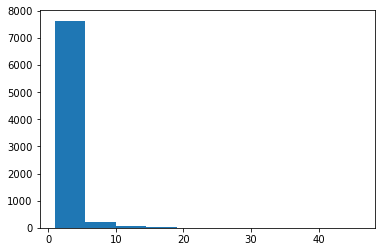

In [67]:
from matplotlib import pyplot
pyplot.hist(y)

## Split the dataset in training set and test set

In [69]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)


## Train the Model

In [70]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

## Predict the test set results

In [71]:
y_pred = lm.predict(x_test)

## Evaluate the model

In [72]:
skl.metrics.r2_score(y_test,y_pred)

0.00037202225578092385

## Calculate Error

In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
print(f"mae: {mae},\nmse: {mse}")

mae: 1.043844803396532,
mse: 4.115309848141802


## Plot the results

Text(0.5, 1.0, 'Actual vs. Predicted')

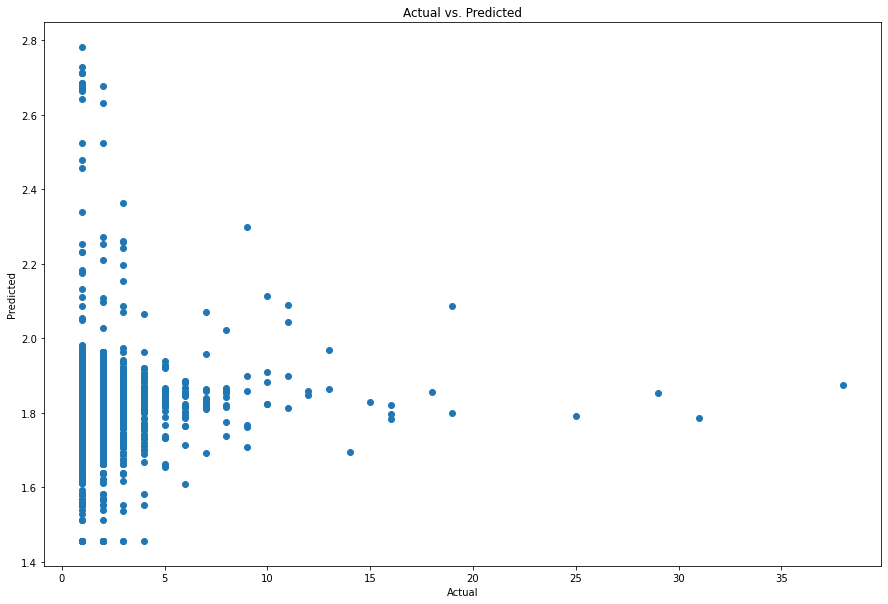

In [74]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

## Predict Values


In [23]:
pred_y_df = pd.DataFrame({'Actual':y_test, 'Predict Value':y_pred, 'Difference': y_pred-y_test})
pred_y_df.sort_values(by='Difference')

,Actual,Predict Value,Difference
733,38,1.873963,-36.126037
1195,31,1.786230,-29.213770
1848,29,1.854260,-27.145740
486,25,1.790832,-23.209168
17,19,1.798454,-17.201546
...,...,...,...
887,1,2.711172,1.711172
297,1,2.711172,1.711172
1091,1,2.711172,1.711172
1089,1,2.728477,1.728477


In [24]:
np.mean(np.absolute(pred_y_df['Difference']))

1.043844803396532

## Random Forest Classifier Method

In [39]:
z = MLdata.drop(['count_item','IID','MID','Male_PERC', 'NON_VIP', 'IID.1','MID.1','count_item.1'],axis=1).values
x_train, x_test, y_train, y_test = train_test_split(z,y,test_size=0.3, random_state=0)

In [40]:
from sklearn.ensemble import RandomForestClassifier
model_RFC = RandomForestClassifier()
model_RFC.fit(x_train,y_train)

RandomForestClassifier()

In [41]:
model_RFC.score(x_test,y_test)

0.6462442299622325

## Predict Test Set Result

In [42]:
y_pred_RFC = model_RFC.predict(x_test)

## Evaluate the model

In [43]:
skl.metrics.r2_score(y_test,y_pred_RFC)

-0.1648823167436484

## Calculate Error

In [44]:
mae = mean_absolute_error(y_test,y_pred_RFC)
mse = mean_squared_error(y_test,y_pred_RFC)
print(f"mae: {mae},\nmse: {mse}")

mae: 0.809903483004616,
mse: 4.795635753252203


## Plot The Results

Text(0.5, 1.0, 'Actual vs. Predicted')

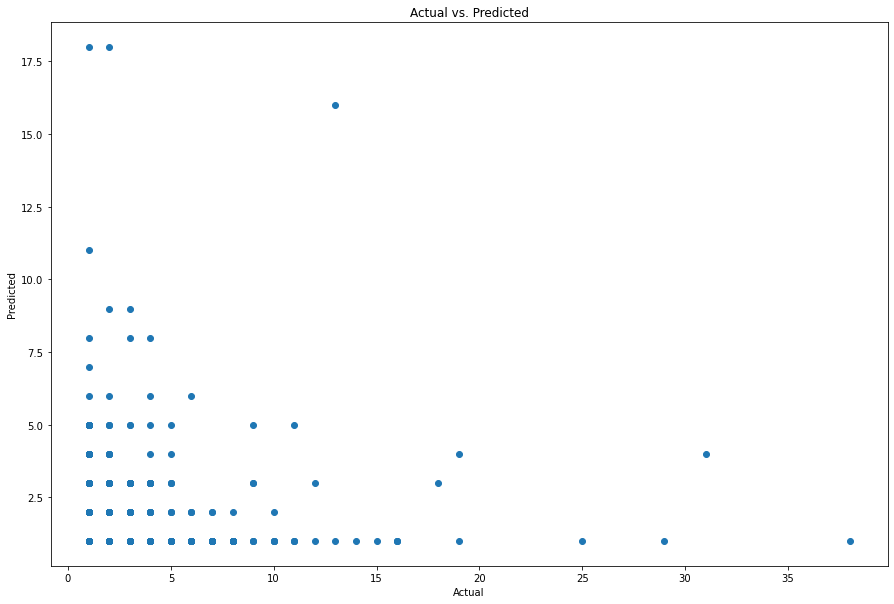

In [45]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred_RFC)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

## Predict Values

In [46]:
pred_y_df_RFC = pd.DataFrame({'Actual':y_test, 'Predict Value':y_pred_RFC, 'Difference': y_pred_RFC-y_test})
pred_y_df_RFC.sort_values(by='Difference')

,Actual,Predict Value,Difference
733,38,1,-37
1848,29,1,-28
1195,31,4,-27
486,25,1,-24
17,19,1,-18
...,...,...,...
1152,1,8,7
1357,2,9,7
1650,1,11,10
1740,2,18,16


In [47]:
np.mean(np.absolute(pred_y_df_RFC['Difference']))

0.809903483004616

# Random Forest Regression Method

In [48]:
from sklearn.ensemble import RandomForestRegressor
model_RFR = RandomForestRegressor()
model_RFR.fit(x_train,y_train)

RandomForestRegressor()

In [49]:
model_RFR.score(x_test,y_test)

0.11396946619065096

## Predict Test Set Result

In [50]:
y_pred_RFR = model_RFR.predict(x_test)

## Evaluate the model

In [51]:
skl.metrics.r2_score(y_test,y_pred_RFR)

0.11396946619065096

## Calculate Error

In [52]:
mae = mean_absolute_error(y_test,y_pred_RFR)
mse = mean_squared_error(y_test,y_pred_RFR)
print(f"mae: {mae},\nmse: {mse}")

mae: 0.9401666725485448,
mse: 3.6476471874749294


## Plot The Results

Text(0.5, 1.0, 'Actual vs. Predicted')

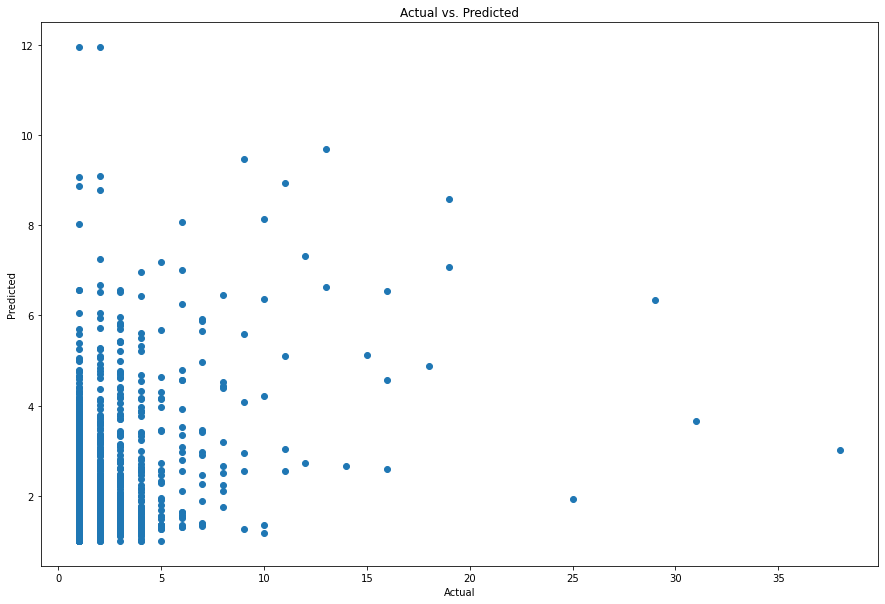

In [53]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred_RFR)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

## Predict Values

In [55]:
pred_y_df_RFR = pd.DataFrame({'Actual':y_test, 'Predict Value':y_pred_RFR, 'Difference': y_pred_RFR-y_test})
pred_y_df_RFR.sort_values(by='Difference')

,Actual,Predict Value,Difference
733,38,3.026667,-34.973333
1195,31,3.660000,-27.340000
486,25,1.938238,-23.061762
1848,29,6.335000,-22.665000
1346,16,2.588187,-13.411813
...,...,...,...
909,2,9.100000,7.100000
768,1,8.860000,7.860000
1650,1,9.065000,8.065000
1740,2,11.952500,9.952500


In [56]:
np.mean(np.absolute(pred_y_df_RFR['Difference']))

0.9401666725485448

## XGBoost Method

In [57]:
import xgboost as xgb

/Users/chriz_yu/opt/anaconda3/envs/CSE801/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [58]:
model_xgb = xgb.XGBRegressor(verbosity =0)
model_xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=10,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=0)

In [59]:
model_xgb.score(x_test,y_test)

0.16013449552425885

## Cross Valid

In [60]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(model_xgb,x_test,y_test, cv=10)
cv_score.mean()

0.18099572818095028

## Predict Test set Result

In [61]:
y_pred_XGB = model_xgb.predict(x_test)
mae = mean_absolute_error(y_test,y_pred_XGB)
mse = mean_squared_error(y_test,y_pred_XGB)
print(f"mae: {mae},\nmse: {mse}")

mae: 0.9334974682761299,
mse: 3.457593083262008


## Plot The Results

Text(0.5, 1.0, 'Actual vs. Predicted')

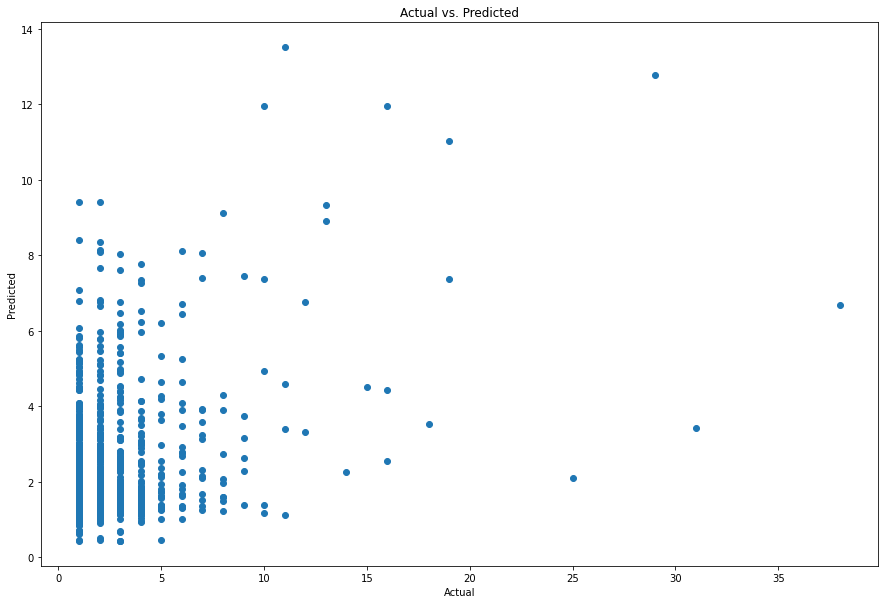

In [62]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred_XGB)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

## Predict Values

In [63]:
pred_y_df_XGB = pd.DataFrame({'Actual':y_test, 'Predict Value':y_pred_XGB, 'Difference': y_pred_XGB-y_test})
pred_y_df_XGB.sort_values(by='Difference')

,Actual,Predict Value,Difference
733,38,6.673614,-31.326386
1195,31,3.413420,-27.586580
486,25,2.098716,-22.901284
1848,29,12.771114,-16.228886
1090,18,3.523093,-14.476907
...,...,...,...
1357,2,8.127452,6.127452
909,2,8.357935,6.357935
1124,1,8.401182,7.401182
1740,2,9.414276,7.414276


In [64]:
np.mean(np.absolute(pred_y_df_XGB['Difference']))

0.9334974682761299

In [39]:
dic = {'I':1,'V':5,'X':10,'L':50,'C':100,'D':500,'M':1000}
x = []
y = []
s= 'MCMXCIV'
for ele in s:
    x.append(dic[ele])
    try:
        if x[-2] < x[-1]:
            y.append(x[-2]*2)
    except : 
        pass

In [40]:
sum(x)-sum(y)

1994

In [46]:
dic = {'I':1,'V':5,'X':10,'L':50,'C':100,'D':500,'M':1000}
su = 0
for i in range(len(s)-1,-1,-1):
    num = dic[s[i]]
    print(num)

5
1
100
10
1000
100
1000


In [85]:
X = [0,0.2,0.33,0.43,0.63,0.66,1]
Y = [0, 0.25, 0.25, 0.5, 0.5, 1,1]
a = 0
for i in range(1,len(X)):
    a += (X[i]-X[i-1])*(Y[i]+Y[i-1])/2
        
a



0.5575

In [88]:
def solution(X, Y):
    x = 0
    for i in range(1,len(X)):
       x += (X[i]-X[i-1])*(Y[i]+Y[i-1])/2
    return x

In [89]:
solution(X,Y)

0.5575

In [59]:
(sum(X)+sum(Y))/2

2.875

In [57]:
del_x

0.66